<a href="https://colab.research.google.com/github/gmm/RDKit-on-Colab/blob/main/RDKit_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Brief Introduction to Chemistry

## Molecules, Atoms, and Bonds

The matter of all life is made of [molecules](https://en.wikipedia.org/wiki/Molecule). Molecules, in turn, are made of [atoms](https://en.wikipedia.org/wiki/Atom) and [bonds](https://en.wikipedia.org/wiki/Chemical_bond). The realm of molecules is incredibly small: too small to see with the naked eye. The simplest possible molecule, dihydrogen, or H<sub>2</sub>, is only 0.74 Å (1 Å = 10<sup>-10</sup> m, or a tenth of a nanometer, 0.1 nm). A water molecule, H<sub>2</sub>O, is about 0.27 nm, or 2.7 Å.

While a looking a little dated to twenty-first century eyes, the classic "Powers of Ten" movie created by the Eames in 1977 visualizes beautifully the amazing worlds that exist at different scales:


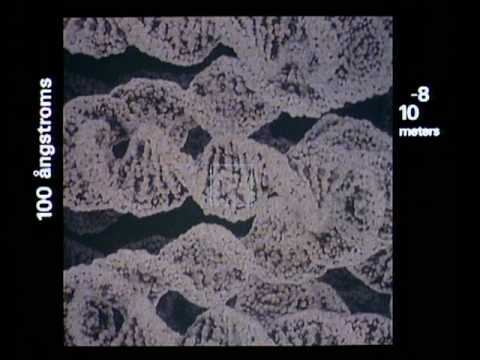

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0fKBhvDjuy0', width=800, height=600) # Powers of Ten™ (1977), 9 min

Atoms have physical and chemical properties that are determined by their atomic and electronic structure: how many protons in the nucleus (determines the element), how many neutrons in the nucleus (determines the isotope) and how many electrons (determines the charge on the atom).

## The Periodic Table

The elements can be arranged periodically according to their number of protons ("atomic number") and the number of electrons in their outermost shells when they are neutral. These periodic patterns of atomic structure reveal similarities in physicochemical properties, and are exemplified in the [Periodic Table](https://en.wikipedia.org/wiki/Periodic_table):

<p style="text-align: center">
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Periodic_table_%2832-col%2C_enwiki%29%2C_black_and_white.png" alt="The Periodic Table" width="1000"/>
</br>
<em>Image Credit: Anonymous, <a href="https://commons.wikimedia.org/wiki/File:Periodic_table_(32-col,_enwiki),_black_and_white.png">Periodic table (32-col, enwiki), black and white</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0/legalcode" rel="license">CC BY-SA 4.0</a></em>
</p>

This video version of the periodic table is particularly fun: [Periodic Videos](http://www.periodicvideos.com)…

The popular free, open-source molecular graphics package, [PyMOL](https://pymolwiki.org/index.php/Main_Page), uses [standard colors to represent different elements](https://pymolwiki.org/index.php/Color_Values#Chemical_element_colours). Perhaps the most common colors you will see are for carbon (green, although this can vary); hydrogen (white); oxygen (red); nitrogen (blue); and sulfur (yellow).

Hydrogen has the simplest atom, with one proton (Z=1) in its nucleus, and one electron. Isotopes of an element have the same number of protons but different numbers of neutrons. Hydrogen has two isotopes: deuterium (with one proton and one neutron (N=1), indicated by the symbol D or <sup>2</sup>H); and tritium (with one proton and two neutrons (N=2), with the symbol T or <sup>3</sup>H).

An atom of helium, He, has two protons (Z=2) and two neutrons (N=2) in its nucleus, and two electrons. Lithium, with the symbol Li, has three protons (Z=3) and three electrons; [Lithium has several isotopes](https://en.wikipedia.org/wiki/Isotopes_of_lithium). Each time we add a proton to the nucleus, we arrive at a new element. To balance the charge, there are an equal number of electrons in a neutral atom.

We have seen that the way the electrons arrange themselves into stable patterns leads to regular, periodic patterns in the properties of elements, as embodied in the periodic table. Next, we will learn about where these patterns come from.

## Electrons and Valency

One of the consequences of the quantum mechanical nature of atoms is that their electrons must reside in discrete, 'quantized' energy levels, sometimes referred to as "[shells](https://en.wikipedia.org/wiki/Electron_shell)". Pre-quantum mechanical ideas visualized these electrons as "orbitting" the nucleus, like planets around a star--but this model is [inaccurate](https://en.wikipedia.org/wiki/Uncertainty_principle). It's better to think of electrons as probability density clouds, which in atoms are known as "[atomic orbitals](https://en.wikipedia.org/wiki/Atomic_orbital)":

<p style="text-align: center">
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Atomic-orbital-clouds_spdf_m0.png" alt="Atomic Orbitals" width="400" style="display=block; margin:auto"/>
<br>
<em>Image Credit: <a href="https://commons.wikimedia.org/wiki/User:Geek3">Geek3</a>, <a href="https://commons.wikimedia.org/wiki/File:Atomic-orbital-clouds_spdf_m0.png">Atomic-orbital-clouds spdf m0</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0/legalcode" rel="license">CC BY-SA 4.0</a></em>
</p>

Each of these shells has a maximum capacity to hold electrons depending on their energy level, and these shells fill up with electrons in order from lowest energy to the highest. The number of protons in the nucleus, and the number of electrons in the highest energy level--or "outermost shell"--determine the physical and chemcial properties of the element, and how many atoms it can bond to at once, a.k.a. its [valency](https://en.wikipedia.org/wiki/Valence_(chemistry)). You [can use valency to figure out the formula](https://www.bbc.co.uk/bitesize/guides/zqrxsbk/revision/2) of a compound.

## Bonds

Pairs of adjacent atoms in molecules are held together by strong *covalent* bonds, which are formed when the atom pairs share their outermost electrons. There are different types of covalent bonds: single, double, and triple bonds, in which one, two, or three pairs of electrons respectively are shared between the bonded atoms. The strongest bonds are triple, followed by double bonds, then single bonds. The stronger the bond, the shorter they tend to be. A C-C single bond is typically about 1.5 A.


### Saturated and Unstaturated Bonds

The concept of "saturation" relates to how much hydrogen is attached to the carbon atoms and whether the carbons are singly, doubly or triply bonded. Hydrocarbons are compounds made up of hydrogen and carbon. A fully saturated hydrocarbon compound has the highest hydrogen to carbon ratio, while an unsaturated compound has the least hydrogen. For example, ethane has the chemical formula C<sub>2</sub>H<sub>6</sub> and the two carbon atoms are connected by a single bond, also known as a 'saturated' bond. Ethene also has two carbon atoms, but it has a double (or 'unsaturated') bond between the carbons, and the formula C<sub>2</sub>H<sub>4</sub>. Ethane is saturated, while ethene is unsaturated.

## Molecules

Molecules are made up of two or more atoms covalently bonded together. If they are large enough, they can also form intramolecular non-covalent bonds like hydrogen-bonds (see below) between their constituent atoms.

[Organic molecules](https://en.wikipedia.org/wiki/Organic_compound) are a subset of molecules found in living systems and are made up of the elements carbon (C) and hydrogen (H), and usually nitrogen (N) and/or oxygen (O). They can also have other elements like phosphorus (P) and sulfur (S). Small molecule drugs can contain other elements, like halogens: fluorine (F), chlorine (Cl), Bromine (Br), and/or iodine (I); or other elements such as boron (B).

## Non-Covalent Bonds

There are also non-covalent bonds, which are weaker than covalent bonds, and can form between parts of the same molecule, or between different molecules. One of the most common non-covalent bonds is the hydrogen bond, or "H-bond" for short. Hydrogen bonds are found between water molecules in liquid water and ice.

## Hydrogen Bonds

[Hydrogen bonds](https://en.wikipedia.org/wiki/Hydrogen_bond) are weak, directional interactions that arise as a result of differences in [electronegativity](https://en.wikipedia.org/wiki/Electronegativity) between hydrogen (less electronegative) and atoms like oxygen and nitrogen (more electronegative). The difference in electronegativity between two atoms in a bond causes the electrons in the bond(s) between the atoms to be distributed unequally, so one atom becomes slightly positively charged, and the other slightly negative. A hydrogen bond involves a hydrogen bond donor such as an N-H group, and a hydrogen bond acceptor such as an oxygen atom, and is often represented by dotted lines: N-H•••O. H-bonds while weak are highly directional: the angle from the H-bonding donor atom, via the H to the H-bonding acceptor tends to be ~180°. This leads to emergent local structure btween molecules, such as the tetrahedral lattice in water ice; or (secondary structure in proteins)[https://en.wikipedia.org/wiki/Protein_secondary_structure] formed by adjacent backbone amide groups.

## Salt Bridges

When the two groups or atoms interacting are charged, they can form salt bridges. These interactions are ionic, and involve positively charged ("cationic") and negatively charged ("anionic") groups. These types of interactions are observed between postively (arginine, lysine and sometimes histidine sidechains) and negatively charged amino acid (aspartic and glutamic acids) side chains (and their N- and C-termini). It's also possible for small molecule drugs to form salt bridges to amino acids in proteins, *e.g.* tamiflu binding to neuraminidase spikes in influenza virus)

## Rings

Molecules can be thought of as (graphs)[https://en.wikipedia.org/wiki/Graph_theory] where the nodes are atoms and the edges are bonds. Just like graphs, molecules can be linear, branched, or cyclic with the atoms arranged in *so called* rings. A saturated hydrocarbon 6-membered ring consists of six carbon atoms connected by six single bonds and is called *saturated*: this molecule is called "cyclohexane", and is an example of an "aliphatic ring"; it has the chemical formula C<sub>6</sub>H<sub>12</sub> But it is also possible to have a *unsaturated* 6-membered hydrocarbon ring with six carbons and alternating single and double bonds: this molecule is called "benzene", and is known as an "[aromatic](https://en.wikipedia.org/wiki/Aromatic_compound) ring"; it has the chemical formula C<sub>6</sub>H<sub>6</sub>. [Aromatic rings](https://en.wikipedia.org/wiki/Simple_aromatic_ring) feature heavily in small molecule drugs. One of the features of [aromaticity](https://en.wikipedia.org/wiki/Aromaticity) are the rings of negative electron clouds above and below the plane of the atoms. Another feature is molecular shape.

## Molecular Shape and Conformation

The shape of aromatic and aliphatic 6-membered carbon rings is quite different. [Benzene](https://en.wikipedia.org/wiki/Benzene), like all aromatic rings, is flat; but aliphatic cyclohexane is three-dimensional. Because it is possible to rotate connected atoms about a single bond, cyclohexane can adopt different [conformations](https://en.wikipedia.org/wiki/Cyclohexane_conformation). The most stable is the *chair* conformation, and the least stable, highest energy state is the *boat* conformation; intermediate between these two is the *twist boat* conformation.

## Chemical Space

With the combinatorics that emerges from the valencies of different elements, different bond types, and whether a molecule is linear, branched or cyclic, it's easy to imagine lots of possible small molecules. [Bohacek *et al.*](https://onlinelibrary.wiley.com/doi/abs/10.1002/%28SICI%291098-1128%28199601%2916%3A1%3C3%3A%3AAID-MED1%3E3.0.CO%3B2-6?sid=nlm%3Apubmed) claimed that just restricting ourselves to molecules with up to 30 atoms chosen from C, N, O, S, and H atoms, the "true number [of molecules] will be well in excess of 10<sup>60</sup>" [Bohacek *et al.*, 1996, *Med. Res. Rev.*, __16__: 3-50).

## Functional Groups

Often when describing parts of molecules that can vary, chemists use the symbol "R" to describe a group or sub-graph that is generic. When there are several points of variation, a subscripted number is used, such as "R<sub>1</sub>" or "R<sub>2</sub>".

Common 'sub-graphs' in molecules are referred to by chemists as "[functional groups](https://en.wikipedia.org/wiki/Functional_group)". Functional groups have unique physicochemical properties, such as being neutral, negatively or positively charged; or being hydrophobic or hydrophilic. Examples include hydroxyl groups, R(OH); carbonyl groups, R<sub>1</sub>(C=O)R<sub>2</sub>; carboxylic acid groups, R(O=C-OH); and ammonium groups, R(NH<sub>3</sub><sup>+</sup>). 

## Molecular Properties

Molecules have [chemical properties](https://en.wikipedia.org/wiki/Chemical_property) and [physical properties](https://en.wikipedia.org/wiki/Physical_property) that emerge from their chemical structure: whether they are solid, liquid or gaseous at a given temperature; their melting point if solid, or boiling point if liquid. They also have properties such as [molecular weight](https://en.wikipedia.org/wiki/Molecular_mass) (the sum of the atomic masses of all the atoms in the molecule, measured in Daltons, or "Da"); and counts, such as the number of non-hydrogen 'heavy' atoms, or the number of hydrogren bond donors. Cheminformatics software allows us to [calculate many such molecular descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation).

## Molecular Recognition and Pharmacophores

Small molecule drugs (sometimes referred to as 'ligands') bind to their target or targets, usually via non-covalent interactions such as H-bonds, salt bridges, and hydrophobic interactions. A key concept in these interactions is *complementarity*: an H-bond donor in the ligand interacts with an H-bond acceptor in the target; a positively charged group in the ligand interacts with a negatively charged group in the target; and so on. In addition to these electrostatic interactions, there are *steric* interactions, governed by [shape complementarity](https://en.wikipedia.org/wiki/Docking_(molecular)#Shape_complementarity), a bit like "knobs" fitting into "holes". Many of these concepts are embodied in protein-ligand [docking](https://en.wikipedia.org/wiki/Docking_(molecular)) software, where a search of the conformational, translational, and orientational degrees of freedom of a protein and ligand is performed using a [scoring function](https://en.wikipedia.org/wiki/Docking_(molecular)#Scoring_function) that quantifies the intermolecular and intramolecular interactions.

The essential 3D arrangement of chemical features required for binding to a target is known as a *pharmacophore*, which the IUPAC defines as: 

>"__Pharmacophore  (pharmacophoric pattern)__ A pharmacophore is the ensemble of steric and electronic features that is necessary to ensure the optimal supramolecular  interactions  with  a  specific  biological  target  structure  and to trigger  (or  to  block) its biological response."

>"A pharmacophore does not represent a real molecule  or a real association of functional groups, but a purely  abstract concept that accounts for the common molecular  interaction  capacities of a  group of compounds towards their  target  structure. The pharmacophore can be considered as the  largest  common  denominator  shared  by a  set of active molecules. This  definition discards a misuse  often  found in the medicinal  chemistry literature which consists of naming  as pharmacophores simple chemical functionalities such  as guanidines,  sulfonamides or dihydroimidazoles (formerly imidazolines), or typical  structural skeletons such as flavones, phenothiazines, prostaglandins or steroids."

For this and other definitions, see: Wermuth CG, Ganellin CR, Lindberg P, and Mitscher LA (1998), "Glossary of terms used in medicinal chemistry (IUPAC Recommendations 1998)", *Pure and Applied Chemistry*, __70__ (5): 1129–1143. [doi:10.1351/pac199870051129](https://www.degruyter.com/document/doi/10.1351/pac199870051129/html)




# Cheminformatics

The discipline of cheminformatics is centred on the storage, analysis and algorithmic manipulation of chemical information. It allows us to store representations of (ususally small organic) molecules in a computer, and run algorithms on them to compute molecular properties, compare molecules, or search massive databases of molecules. In combination with machine learning, cheminformatics allows us to expand our models to molecular property prediction and even *de novo* design. The open source cheminformatics API, [RDKit](http://www.rdkit.org), provides a wealth of such functionality, that can be accessed from e`ither C++ or [Python](https://www.rdkit.org/docs/GettingStartedInPython.htmlhttps://www.rdkit.org/docs/GettingStartedInPython.html).

## Python & iPython

[Python](https://www.python.org) is a general purpose, object-oriented, interpreted language that acts a computational glue for a wide variety of mathematical and scientific algorithms, including cheminformatics, bioinformatics, and biomolecular simulation. It has become extremely popular in data science. 

[iPython](https://ipython.org) provides a powerful interactive Python environment that also works well with the host operating system using so called [magic commands](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html), which unlike Python begin with a "%" symbol. For example, "%cd" will change the directory that Python is currently running in. iPython also supports interactive data visualization and the use of GUI (Graphical User Interface) toolkits.

The Python language has two variants: Python 2 and Python 3; while they are very similar, they are not backwards-compatible. This notebook has been written using Python 3 syntax.

## Jupyter Notebooks on Google Colab

Google provides a way to run Python from a web browser. This is done using [Jupyter](https://jupyter.org), which gives us a way to store code and document it in documents called notebooks, with the file extension ``.ipynb``. These notebooks have "cells" in which you can type Python code, or [Markdown](https://daringfireball.net/projects/markdown/)-formatted text. These Jupyter iPython notebooks run on Google servers remotely using "Google Colab". This iPython Notebook has been developed to run on Google Colab.

Google Colab connects to remote virtual machines known as Google Compute Engine (GCE), and offers different types of runtimes which can be changed from the Runtime menu. Google Colab is a free service, but it is possible to pay for higher tier service that includes access to more memory, GPUs (Graphics Processing Units) and TPUs (Tensor Processing Units).

Let's check what type of CPU we have (and how many cores); and also what the operating system (OS) is:


In [2]:
# What type of CPU are we running on?
!printf 'CPU Details:\n============\n\n'
!lscpu

# What is our Operating System and architecture?
!printf '\n\nOS and Architecture:\n====================\n\n'
!uname -a

# How much disk space is there?
!printf '\n\nDisk Space:\n===========\n\n'
!df -h .

# What is our current directory?
!printf '\n\nCurrent Directory:\n==================\n\n'
%pwd

CPU Details:

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1


'/content'

## Software Package Managers

Software can have many dependencies so we use package managers to take care of tracking these details. In Python, we can install extra functionality using the software package manager "[Conda](https://docs.conda.io/en/latest/)". Conda automatically includes a large number of Python packages like [NumPy](https://numpy.org) and [SciPy](https://scipy.org), but it doesn't include RDKit.

We start by installing Conda and Mamba (a faster implementation of Conda). We will use these to install the additional Python packages we need -- most importantly, RDKit.



## 1. Install the Python Package Manager

First we need to install conda before we can install RDKit. We use CondaColab, which was developed by [Jaime Rodríguez-Guerra](https://github.com/jaimergp), a solution that is discussed here:

* https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/.

This needs to be run at the start of the notebook, because it restarts the kernel.

CondaColab uses [Mamba](https://mamba.readthedocs.io/en/latest/index.html), a "fast, robust, and cross-platform package manager, ... a Python-based CLI conceived as a drop-in replacement for conda, offering higher speed and more reliable environment solutions." Mamba's [core is implemented in C++ and allows parallel downloading of repository data and package files using multi-threading](https://github.com/mamba-org/mamba).

By default, CondaColab installs Mambaforge,  but `condacolab.install_anaconda()` [will install the Anaconda 2020.02 distribution, the last version that was built for Python 3.7](https://github.com/jaimergp/condacolab) (which is needed for Google Colab as of July 2021).

Don't panic when you see "Your session crashed for an unknown reason." pop up: the kernel restarts automatically so it has access to the newly installed software, but Colab picks this up as an error. You want this to happen, so you can use the new `conda` environment.

In [10]:
# Running this cell is only necessary when running this Notebook on Google Colab

# install condacolab
!time pip install -q condacolab  # ~5s to run

import condacolab
condacolab.install()  # for ML, use `condacolab.install_anaconda()`; ~30s to run

# When finished, the kernel will restart automatically with the new conda
# functionality and will show the message:
#
# 🔁 Restarting kernel...
#
# and a pop-up at the bottom of the screen saying:
#
# "Your session crashed for an unknown reason. View the runtime logs."
#
# Don't Panic...!
# --Just click the "X" to dismiss it.


real	0m5.387s
user	0m2.708s
sys	0m0.295s
✨🍰✨ Everything looks OK!


Check the versions of conda and mamba: they should be 4.9.2 and 0.8.0 or later, respectively.

In [11]:
!which conda
!conda --version
!which mamba
!mamba --version

/usr/local/bin/conda
conda 22.11.1
/usr/local/bin/mamba
mamba 1.1.0
conda 22.11.1


# 2. Update the Package Manager

In tests, `Mamba` seems to be slightly faster than `Conda` to update all the packages. We will update ``mamba`` and ``conda`` and then check that ``condacolab`` is working.

In [14]:
#!time conda update -y -n base conda
!time mamba update -y -n base mamba  # ~5s to run
!time mamba update -y -n base conda  # ~16-18s to run


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['mamba']

conda-forge/linux-64                                        Using cache
conda-forge/noarc

In [15]:
!conda --version
!mamba --version

conda 22.11.1
mamba 1.1.0
conda 22.11.1


In [16]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


# 3. Install Python Packages

We will use mamba to install the necessary Python packages, starting with RDKit.


## 3.1 Install RDKit

In [17]:
# Install the latest version of RDKit using mamba
#
#  -- Hint: don't create a separate environment, otherwise you must activate
#           the separate environment before Google's Jupyter restarts.

!time mamba install -y -c rdkit rdkit  # ~41s to install


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

conda-forge/linux-64                                        Using cache
conda-forge/noarc

## 3.2 Install Molecular Graphics Packages

Py3Dmol lets us view and interact with 3D molecules directly in iPython and Jupyter Notebooks. It is built by wrapping 3Dmol.js in Python.

In [18]:
!time mamba install -y -c conda-forge py3dmol  # ~1 min to install


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['py3dmol']

conda-forge/linux-64                                        Using cache
conda-forge/noa

NGLview can also be used to display proteins, as well as grids and meshes:

In [19]:
!time mamba install nglview -c bioconda # ~10s to install


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['nglview']

conda-forge/linux-64                                        Using cache
conda-forge/noa

It is also possible to install and interact with PyMOL's command mode:

In [20]:
!time mamba install schrodinger::pymol


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['schrodinger::pymol']

conda-forge/linux-64                                        Using cache
cond

## 3.3 Install PubChemPy

In [21]:
!mamba install -c mcs07 pubchempy


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pubchempy']

conda-forge/linux-64                                        Using cache
conda-forge/n

# 4. Current Directory and Files

In [22]:
# What directory are we in?
%pwd

'/content'

In [23]:
# What files and directories are already here?
%ls

condacolab_install.log  sample_data/


# 5. Import Packages

We will import all the Python packages we need to explore cheminformatics: RDKit, molecular graphics packages, and other important packages for data science and visualizing molecules using vector graphics.


## 5.1 Import RDKit

There are lots of useful websites explaining how to use RDKit:

*   [Getting Started with the RDKit in Python](https://rdkit.readthedocs.io/en/latest/GettingStartedInPython.html)
* [Greg Landrum's RDKit Blog](https://greglandrum.github.io/rdkit-blog)
** [Generating 3D conformers of molecules](https://greglandrum.github.io/rdkit-blog/conformers/exploration/2021/02/22/etkdg-and-distance-constraints.html)
*   https://xinhaoli74.github.io/blog/
**    https://xinhaoli74.github.io/blog/rdkit/2021/01/06/rdkit.html



In [24]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw # to draw molecules
from rdkit.Chem.Draw import IPythonConsole # to draw inline in iPython
from rdkit.Chem import AllChem  # we need this to compute 2D depictions
from rdkit.Chem import rdDepictor  # to generate 2D depictions of molecules
from rdkit.Chem.Draw import rdMolDraw2D # to draw 2D molecules using vectors
from rdkit.Chem import PandasTools # we use this to read in SDFs into pandas dataframes

# What version of RDKit are we running?
print(rdkit.__version__)

2022.09.4


## 5.2 Import Molecular Graphics Packages

In [25]:
from google.colab import output
output.enable_custom_widget_manager()

In [26]:
from ipywidgets import interactive, VBox

from pathlib import Path

In [27]:
# 3D Molecules
import py3Dmol # for inline 3D interactive views of molecules

import nglview # for 3D interactive views of molecules & grids

In [28]:
# To show molecules interactively in 3D:
IPythonConsole.ipython_3d = True

# later on, get a conformer from an RDKit molecule, and then use:
# IPythonConsole.drawMol3D(m, confID=cids[0])
# See also: https://greglandrum.github.io/rdkit-blog/conformers/exploration/2021/02/22/etkdg-and-distance-constraints.html


## 5.3 Import copy, pandas, and SVG

In [29]:
# Copying Objects
from copy import deepcopy  # we need deep copies of the molecule to avoid losing 3D coordinates

# Pandas DataFrames
import pandas as pd # we need this to make copies of pandas columns of molecules

# Plotting Graphs
# for pylab-style plotting: %pylab inline # see: https://stackoverflow.com/questions/20961287/what-is-pylab#20962070

# Draw Vectors in Notebooks
from IPython.display import SVG # to use Scalar Vector Graphics (SVG) not bitmaps, for cleaner lines

# 6. Let's Draw Some Molecules!

We can create molecules by starting from a string that describes the elements, bonds (and their connectivity), stereochemistry, and charge of the molecule, using SMILES strings.

## What is a SMILES String?

SMILES stands for [Simplified Molecular Input Line Entry System](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system). Atoms in a molecule are represented by their element name. Single bonds are implied, but double bonds are written using equals-signs, '='; and triple bonds are written using hash symbols, '#'. Branched parts of molecules are written inside parentheses, and these can be nested. Rings are closed by writing numeric digits after the two atoms connecting up the ring, and atoms in aromatic rings are written using lower case (while aliphatic ring atoms are in upper case):

<p>
<img src="https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png" width="400"/>
</br>
<em>Image Credit: Original by <a href="https://commons.wikimedia.org/wiki/User:Fdardel">Fdardel</a>, slight edit by <a href="https://commons.wikimedia.org/wiki/User:DMacks">DMacks</a>, <a href="https://commons.wikimedia.org/wiki/File:SMILES.png">SMILES</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0/legalcode" rel="license">CC BY-SA 3.0</a></em>
</p>

Daylight has some *great* resources on SMILES, and SMARTS, which is the regular expression variant of SMILES:

* SMILES:
  * [SMILES Tutorial](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html)
  * [SMILES Examples](https://www.daylight.com/dayhtml_tutorials/languages/smiles/smiles_examples.html)
* SMARTS:
  * [SMARTS Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html)
  * [SMARTS Examples](https://daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html)


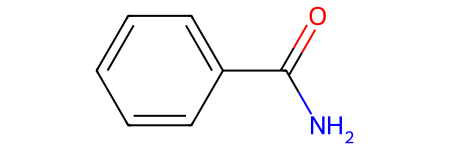

In [30]:
# Here, we have a 6-membered aromatic ring consisting only of carbons,
# connected to a carbon atom that is in turn connected to an oxygen atom
# via a double bond, and also bonded to an amine nitrogen atom:

mol = Chem.MolFromSmiles('c1ccccc1C(=O)N')

# If we give just the RDKit molecule object's name, it will be drawn in 2D:

mol

Each atom has an index, a counter that gives each atom a unique integer.

Let's define a function called "``set_atom_index_labels``" to set atom labels by their index. It takes as input the following parameters:

 * ``mol``, an RDKit molecule
 * ``label``, a string consisting of one of these options:
  * ``'atomLabel'``
  * ``'molAtomMapNumber'``
  * ``'atomNote'``
 * ``one_based``, optional; a boolean parameter which by default is set to ``False``, meaning atoms are numbered from 0 by default; if set to ``True``, then they are numbered from 1.


In [31]:
def set_atom_index_labels(mol, label, one_based=False):
  """See https://stackoverflow.com/questions/53321453/rdkit-how-to-show-moleculars-atoms-number?answertab=active#tab-top"""
  for atom in mol.GetAtoms():
    if one_based:
      str_index = str(atom.GetIdx()+1)
    else:
      str_index = str(atom.GetIdx())
    atom.SetProp(label, str_index)
  return mol

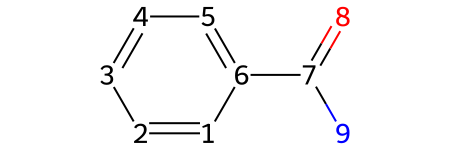

In [32]:
mol = Chem.MolFromSmiles('c1ccccc1C(=O)N')
set_atom_index_labels(mol, 'atomLabel', one_based=True)

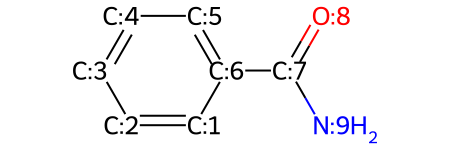

In [33]:
mol = Chem.MolFromSmiles('c1ccccc1C(=O)N')
set_atom_index_labels(mol, 'molAtomMapNumber', one_based=True)

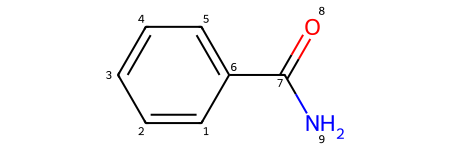

In [34]:
mol = Chem.MolFromSmiles('c1ccccc1C(=O)N')
set_atom_index_labels(mol, 'atomNote', one_based=True)

As of 2022, there are some [new features and refinements in the way RDKit draws molecules (and reactions)](https://greglandrum.github.io/rdkit-blog/technical/2022/03/18/refactoring-moldraw2d.html). Here's one example, using the bimap renderer, Cairo, which allows us to control the font size and relative scaling of the bond lengths (and hence, the molecule):

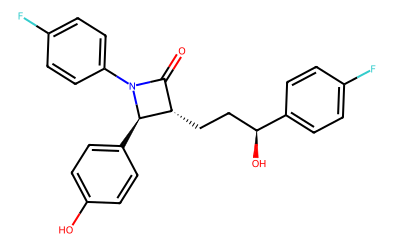

In [58]:
from IPython.core.display import Image

def mol_to_image(molecule, scaling=20, font_size=24):
  """Draw a molecule with the supplied RDKit molecule object,
  and allow control of scaling and font size.
  The units of scaling are ~pixels/Angstrom"""
  d2d = Draw.MolDraw2DCairo(-1,-1)
  d2d.drawOptions().scalingFactor = scaling  # units are roughly pixels/angstrom
  d2d.drawOptions().fixedFontSize = font_size
  d2d.DrawMolecule(molecule)
  d2d.FinishDrawing()
  Image(d2d.GetDrawingText())
  return Image(d2d.GetDrawingText())

def smiles_to_image(molecule_SMILES, scaling=20, font_size=24):
  """Draw a molecule with the supplied SMILES string,
  and allow control of scaling and font size.
  The units of scaling are ~pixels/Angstrom"""
  image = mol_to_image(Chem.MolFromSmiles(molecule_SMILES), 
                       scaling=scaling, font_size=font_size)
  return image

ezetimibe_SMILES = 'O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O)cc2)N1c1ccc(F)cc1'
smiles_to_image(ezetimibe_SMILES, font_size=10)

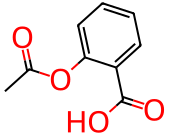

In [59]:
aspirin_SMILES = 'O=C(C)Oc1ccccc1C(=O)O'
smiles_to_image(aspirin_SMILES, font_size=30)

# 7. Draw Sharper Molecules Using Vectors, not Bitmaps

This code uses SVG (Scalar Vector Graphics) to depict molecules using vector graphics.

See: https://leedavies.dev/index.php/2018/10/06/rdkit-in-jupyter-notebooks/

In [ ]:
def draw_mol_with_SVG(mol, molSize=(450,150)):
  """Use SVG to draw an RDKit molecule, mol."""
  mc = Chem.Mol(mol.ToBinary())
  if not mc.GetNumConformers():
    # Compute 2D coordinates
    rdDepictor.Compute2DCoords(mc)

  # Initialize the drawer with the size
  drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])

  # Draw the molcule
  drawer.DrawMolecule(mc)
  drawer.FinishDrawing()

  # Get the SVG string
  svg = drawer.GetDrawingText()

  # Fix the SVG string and display it
  display(SVG(svg.replace('svg:','')))

mol = Chem.MolFromSmiles('c1ccccc1C(=O)N')
draw_mol_with_SVG(mol)

# 8. Draw Molecules in a Grid

The first example shows how we can describe benzene in different ways using SMILES, but RDKit draws all the resulting molecules in the same way:

In [ ]:
benzene_smiles = ['C1C=CC=CC=1',
                  'C1=CC=CC=C1',
                  'c1ccccc1',
                  'C1:C:C:C:C:C:1']
benzene_names = ['benzene (single/double)',
                 'benzene (double/single)',
                 'benzene (aromatic cabons)',
                 'benzene (aromatic bonds)']
benzene_mols = [Chem.MolFromSmiles(s) for s in benzene_smiles]

In [ ]:
Draw.MolsToGridImage(benzene_mols, molsPerRow=4, subImgSize=(150,150), 
                     legends=['  '+n+'  ' for n in benzene_names],
                     useSVG=True)

If we number the atoms, we can see that RDKit always chooses to draw the ring bonds using alternating double then single bonds, regardless of how we specified the SMILES string:

In [ ]:
for m in benzene_mols:
  set_atom_index_labels(m, 'atomNote', one_based=True)

Draw.MolsToGridImage(benzene_mols, molsPerRow=4, subImgSize=(150,150), 
                     legends=['  '+n+'  ' for n in benzene_names],
                     useSVG=True)

In [ ]:
smiles = [ 'N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1',
           'c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21',
           'C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1',
           'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1']

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=smiles)

There are lots of ways of highlighting molecules in RDKit, too; see http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html.

## Highlighting Molecules with SMARTS

RDKit lets us highlight substructures in molecules; we use regular expressions that describe the substructures. The simplest version looks just like a SMILES string, but if we need more control, we can use SMARTS expressions. Many operating systems and programming languages support wildcards, like '\*' matching any file in a shell, or '\*.txt' matching all the text files.

Let's define a method to draw a molecule and highlight a substructure if present:

In [ ]:
def draw_mol_highlighted(mol, substructure, size=(400, 200)):
    """Based on code from betelgeuse on Stack Overflow;
    See: https://stackoverflow.com/questions/69735586/how-to-highlight-the-substructure-of-a-molecule-with-thick-red-lines-in-rdkit-as"""
    mol = deepcopy(mol)
    substructure = deepcopy(substructure)
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    
    # highlightAtoms expects only one tuple, not tuple of tuples. So it needs to be merged into a single tuple
    matches = sum(mol.GetSubstructMatches(substructure), ())
    drawer.DrawMolecule(mol, highlightAtoms=matches)
    
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    
    return svg.replace('svg:','')


mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
SVG(draw_mol_highlighted(mol, substructure))

Instead of using SMILES strings for our substructures, we can use SMARTS regular expressions. Daylight offers some great [SMARTS examples](https://daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html) and a [tutorial about how to write SMARTS expressions](https://www.daylight.com/dayhtml_tutorials/languages/smarts/), as well as detailed [theory about SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html). You can also check your SMARTS expressions visually using the [SMARTS.plus](https://smarts.plus) website. 

A SMILES string like ``'C(=O)O'`` matches both carboxylic acid groups and ester linkages. Insteac, we can use a SMARTS expression that only matches carboxylic acids: ``'[CX3](=O)[OX2H1]'``:

In [ ]:
substructure = Chem.MolFromSmarts('[CX3](=O)[OX2H1]')
SVG(draw_mol_highlighted(mol, substructure))

Here, we use the SMARTS for a methyl group, ``'[CD1H3]'``, where the square brackets refer to a single atom, in this case a carbon atom (``C``) of degree one (``D1``), _i.e._, one explicit connection; and three attached hydrogens (``H3``):

In [ ]:
substructure = Chem.MolFromSmarts('[CD1H3]') # methyl groups
SVG(draw_mol_highlighted(mol, substructure))

# 9. Download 3D Structures of Drugs from DrugBank

Free access to DrugBank is permitted for students, academics and non-profits; but you need to apply for access, then use your username and password to login or `wget` files (using `--user` and `--password`).

See: https://go.drugbank.com/releases/latest#structures

We will download the 3D-structures of all the drugs in DrugBank (including approved, investigational, withdrawn, experimental, and nutraceuticals).

In [ ]:
### WARNING! NEVER EMBED USERNAME AND PASSWORD IN CODE!!! ###
### ESPECIALLY IF YOU'RE SAVING OR COMMITTING CHANGES!!! ###

import getpass # Helps to hide characters while typing passwords

user = getpass.getpass("DrugBank username: ")
pwd = getpass.getpass("DrugBank password: ")

!wget --user $user --password $pwd https://go.drugbank.com/releases/5-1-8/downloads/all-3d-structures
#!wget --user $user --password $pwd https://go.drugbank.com/releases/5-1-8/downloads/all-structures
#!wget --user $user --password $pwd https://go.drugbank.com/releases/5-1-8/downloads/all-structure-links

In [ ]:
# Unzip the downloaded 3D structures, and rename the file to 
# remove space:
%ls
!unzip all-3d-structures
#!unzip all-structures      # If downloading 2D drugs
#!unzip all-structure-links # If downloading info about drugs
!mv 3D\ structures.sdf all-drugbank-3D.sdf
%ls

# 10. Get 3D Structures of Drugs from DrugBank

This will include everything: approved, withdrawn, illicit drugs and nutraceuticals, etc.

In [ ]:
%%time
# Takes about 15s to load all the drugs into a Pandas dataframe...
# Read in the 3D coordinates of all the drugs in DrugBank
# See Susan Leung's Blopig post: https://www.blopig.com/blog/2017/02/using-rdkit-to-load-ligand-sdfs-into-pandas-dataframes/
filename = 'all-drugbank-3D.sdf'
drugbank = PandasTools.LoadSDF(filename)

In [ ]:
drugbank.info()

In [ ]:
drugbank[:3]

In [ ]:
# Show just the drug's generic name, MW, and structure columns:

drugbank_three = drugbank[['GENERIC_NAME', 'MOLECULAR_WEIGHT', 'ROMol']][:3]
drugbank_three

In [ ]:
# It seems Google Colab stops rendering molecules in pandas tables
# after the first rendered table... One workaround is to explicitly render 
# the dataframe using HTML from IPython.core.display:

from IPython.core.display import HTML
HTML(drugbank_three.to_html(escape=False)) # might need to scroll a bit...

## 10.1 Interacting with a Grid of DrugBank Drugs

We can use [mols2grid](https://pythonrepo.com/repo/cbouy-mols2grid) to view molecules in a grid, and can interact with it, re-sorting by properties, or searching by name or even SMARTS. You can type in "acid" in the search field and find all the drugs that have acid in their generic name, for example; or sort by molecular weight (MW).

Note that unfortunately, [getting the selection from a mols2grid object fails on Google Colab--this is a known issue](https://github.com/cbouy/mols2grid/issues/20).

In [ ]:
!time mamba install -y -c conda-forge mols2grid ipywidgets

In [ ]:
from rdkit.Chem import Descriptors, Draw
from ipywidgets import interact, widgets
import urllib
from IPython.display import display
import mols2grid
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
drugbank.rename(columns={'GENERIC_NAME':'Generic_Name', 
                         'MOLECULAR_WEIGHT':'MW',
                         'JCHEM_PKA':'pKa',
                         'DRUGBANK_ID':'DrugBank_ID'},
                inplace=True)

mols2grid.display(
    drugbank,
    # set the fields  displayed on the grid
    subset=['DrugBank_ID', 'img', 'ID'],
    # set the fields displayed on mouse hover
    tooltip=['Generic_Name', 'MW']
)

Try sorting by molecular weight (MW), then search for all molecules with "acid" in their name. You might need to scroll the table in the cell to see the "Sort by" and "Search" fields.

In [ ]:
# If you use the checkboxes to select molecules, it is possible to click on the 
# checkbox menu to the left of the "Sort by" menu, and then copy the selection 
# to the clipboard, or save as a SMILES or CSV.

# On Google Colab, choose "Copy to clipboard", then paste what was copied
# in a cell like this:
# selection = <paste-the-dictionary-mols2grid-copied-here>

# e.g., the three lowest MW acid-containing drugs in DrugBank are:
selection = {1587:"NC1(CC1)C(O)=O",2844:"C\\C=C(/N)C(O)=O",1338:"CC(=O)CC(O)=O"}

In [ ]:
# Alternatively, if not on Google Colab, you can retrieve the selected 
# entries in the dataframe programmatically:
# (This programmatic method also fails in Google Colab) :-(
mols2grid.get_selection()

# Alternative method also fails on Google Colab, unfortunately:
grid_selection = drugbank.iloc[list(mols2grid.get_selection().keys())]
grid_selection

In [ ]:
selected_smiles = list(selection.values())
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in selected_smiles], molsPerRow=3, subImgSize=(150,150), 
                     legends=[f'  {s}  ' for s in selected_smiles],
                     useSVG=True)

# 11. 2D versus 3D Molecules

Chemists like to draw the structures of molecules by laying out all the atoms in two dimensions--even when the molecules themselves are three-dimensional. We can use RDKit to convert a molecule with 3D coordinates into 2D, thus making all the atoms in the chemical structure easier to see.

Note: This section requires you to have downloaded the 3D-structures of all drugs from DrugBank.

Note also: in Python, we must make _deep_ copies of molecules, otherwise when we convert to 2D, Compute2DCoords will overwrite the original 3D-coordinates of the atoms.

In [ ]:
copy_of_mols = pd.Series( deepcopy(drugbank['ROMol'].to_dict()) ) 
# See: https://stackoverflow.com/questions/52708341/make-a-truly-deep-copy-of-a-pandas-series
for m in copy_of_mols:
  _ = AllChem.Compute2DCoords(m) # only updates coords of m "in place"
drugbank_2D = [m for m in copy_of_mols]

drugbank['ROMol_2D'] = drugbank_2D

In [ ]:
for i in range(3):
  print(drugbank["Generic_Name"][i])
  draw_mol_with_SVG(drugbank["ROMol_2D"][i])
  print(60*'_')

In [ ]:
drugbank_2D_first_3 = drugbank[['Generic_Name', 'MW', 'ROMol_2D']][:3]
drugbank_2D_first_3

In [ ]:
HTML(drugbank_2D_first_3.to_html()) # sadly, in Google Colab notebooks we need to call HTML()

In [ ]:
his_2D = drugbank['ROMol_2D'][2] # Histidine
set_atom_index_labels(his_2D,'atomNote') # Label atom indices, counting from 0
his_2D # atom 6 is chiral, but it is not obvious from this diagram:

### 11.1 Chirality and Adding Hydrogens

Converting from a 3D molecule to 2D for chemical drawing can sometimes lose chiral information. We can use RDKit to assign chirality to atoms, and then find the chiral centers in the molecule, if any.

RDKit can add hydrogens to both 2D and 3D molecules; by default, it sets the coordinates of the hydrogens to the origin. This might be fine in some situations, but if we are using the molecules for docking, _e.g._, this is a problem. We have to ask RDKit to add sensible coordinates for the hydrogens. (By not doing this by default, it saves time for those applications that don't need this information.)

Histidine is one of the drugs in [DrugBank](https://go.drugbank.com/drugs/DB00117), and just like most amino acids, it has a chiral centre at its α-carbon.

In [ ]:
his = drugbank['ROMol'][2] # Histidine
set_atom_index_labels(his,'atomNote') # Label atom indices, counting from 0
his # atom 6 is chiral, but it is not obvious from this diagram:

Let's ask RDKit to identify all the chiral atoms in histidine:

In [ ]:
Chem.AssignAtomChiralTagsFromStructure(his)
print('Chiral centers in 3D-histine:', Chem.FindMolChiralCenters(his, includeUnassigned=True)) 
# Atom 6 has known chirality, 'S', in the original 3D molecule:

Converting from 3D to 2D can lose chiral information:

In [ ]:
Chem.AssignAtomChiralTagsFromStructure(his_2D)
print('Chiral centers in 2D-histine:', Chem.FindMolChiralCenters(his_2D, includeUnassigned=True)) 
# Atom 6 has unknown chirality, '?':

In [ ]:
 his_3D = drugbank['ROMol'][2] # Histidine, https://go.drugbank.com/drugs/DB00117

In [ ]:
his_3D # by default, we see the 3D viewer because it is a 3D molecule

In [ ]:
IPythonConsole.ipython_3d = False # we can also turn off 3D viewing:

his_3D # but a 3D molecule drawn in 3D can be hard to see; the 5-membered imidazole ring is edge-on:

In [ ]:
IPythonConsole.ipython_3d = True # Let's turn 3D-rendering back on

his_3D

In [ ]:
IPythonConsole.drawMol3D(his_3D) # we can also force 3D-molecule drawing, regardless of the ipython_3d setting:

In [ ]:
# Let's add hydrogens, making them all explicit:

his_2D_H=Chem.AddHs(his_2D) # Adds Hs, but for 2D molecules they are all at (0,0)
AllChem.Compute2DCoords(his_2D_H) # Give Hs sensible positions

Chem.AssignAtomChiralTagsFromStructure(his_2D_H) # assign chirality
print('2D-mol assigned chirality:', 
      Chem.FindMolChiralCenters(his_2D_H, includeUnassigned=True))

set_atom_index_labels(his_2D_H,'atomNote') # Label atom indices, counting from 0
his_2D_H

In [ ]:
his_3D_H=Chem.AddHs(his_3D) # Adds Hs, but they're all at (0,0,0)!
his_3D_H

Oh-oh... let's add hydrogens with sensible (_x,y,z_)-coordinates...

In [ ]:
his_3D = drugbank['ROMol'][2]
his_3D_H=Chem.AddHs(his_3D, addCoords=True) # Adds Hs, with sensible 3D-coordinates
his_3D_H

In [ ]:
# Now, let's check the chiral centres again, this time with
# all hydrogens explicitly added:
Chem.AssignAtomChiralTagsFromStructure(his_3D_H) # assign chirality
print("3D-molecule's chiral centres, [(atom index, chirality)]:", 
      Chem.FindMolChiralCenters(his_3D_H, includeUnassigned=True))

We can see that now, the chiral center (atom 6, which is the α-carbon in the [amino acid](https://en.wikipedia.org/wiki/Amino_acid)) has a defined chirality (S). Almost all naturally-occuring amino acids that have sidechains have the same chirality, S (also known as "laevorotatory" or L-amino acids, so named because of how samples cause light to be polarized), with the exception of cysteine, which is (R); and glycine, which lacks a sidechain is achiral.

Note, though, RDKit's method for adding hydrogens has treated the whole molecule as neutral, which is a reasonable assumption; but there are several ioinizable functional groups here: the carboxylate, the amine, and the imidazole ring in the side chain.

## 11.2 Ionizable Groups

In [ ]:
ionizable_groups_smiles = ['CC(=O)O', 'CC(=O)[O-]', 
                           'C[NH2]', 'C[NH3+]', 
                           'Cc1[nH]cnc1',
                           'Cc1nc[nH]c1',
                           'Cc1[nH+]c[nH]c1']
ionizable_groups_names = ['Carboxylate (neutral)', 'Carboxylate (negative)',
                          'Amine (neutral)', 'Amine (positive)',
                          'Imidazole (neutroal, N-delta',
                          'Imidazole (neutral, N-epsilon-H', 
                          'Imidazole (positive)']

ionizable_groups = [Chem.MolFromSmiles(s) for s in ionizable_groups_smiles]

In [ ]:
def set_mol_names(mols, names):
  """Set the names of the molecules in mols to the corresponding names in names.
  Assumes number and order of mols and names is the same."""
  assert len(mols) == len(names) # need same number of mols and names
  for mol, name in zip(mols, names):
    mol.SetProp('_Name', name)

set_mol_names(ionizable_groups, ionizable_groups_names)

# Pad the legends with spaces so they can 'breathe'...
Draw.MolsToGridImage(ionizable_groups, molsPerRow=2, subImgSize=(150,150), 
                     legends=['  '+n+'  ' for n in ionizable_groups_names], 
                     useSVG=True)

## 11.3 Names and Synonyms of Molecules

In [ ]:
# Let's use PubChem to look up the standard IUPAC names of these groups:

from pubchempy import get_compounds, Compound

In [ ]:
def get_IUPAC_name_from_smiles(smiles):
  """Use PubChemPy's get_compounds to look up the IUPAC name from the molecule 
  supplied as a SMILES string."""
  cpds = get_compounds(smiles, 'smiles')
  assert len(cpds) == 1 # Hopefully, there is only one IUPAC name
  c = cpds[0]
  return c.iupac_name

def get_synonyms_from_smiles(smiles):
  """Use PubChemPy's get_compounds to look up the synomyms from the molecule 
  supplied as a SMILES string."""
  cpds = get_compounds(smiles, 'smiles')
  assert len(cpds) == 1 # Hopefully, there is only one IUPAC name
  c = cpds[0]
  return c.synonyms

In [ ]:
ionizable_groups_IUPAC_names = [get_IUPAC_name_from_smiles(s) 
                                for s in ionizable_groups_smiles]

for s, iupac_name in zip(ionizable_groups_smiles, ionizable_groups_IUPAC_names):
  print(f'SMILES: {s:15s}\tIUPAC name is "{iupac_name}"')

In [ ]:
# Let's redraw the ionizable groups, but with their IUPAC names instead:
set_mol_names(ionizable_groups, ionizable_groups_IUPAC_names)

Draw.MolsToGridImage(ionizable_groups, molsPerRow=2, subImgSize=(150,150), 
                     legends=['  '+n+'  ' for n in ionizable_groups_IUPAC_names],
                     useSVG=True)

## 11.4 Standardization

_"Cheminformatics is hard."_ -- Paul Finn

Just as there are many different ways of drawing the same molecule, SMILES is flexible enough to allow us to write the same molecule in different ways. In some situations, _e.g._, in machine learning, we need to map all these variants SMILES back to the same molecule, to remove duplicates.

### 11.4.1 Different Versions of the Same Molecule: Salts, Neutral or Charged?
Sometimes, a chemical supplier or compound vendor gives us a SMILES string for a salt of the compound, _e.g._, sodium acetate, but all we care about is the organic anion, acetate. Very often, our models are built on the assumption we have one molecule as input--but a salt will appear as two molecules (the sodium ion and the acetate ion). We might also have been given the negatively-charged acetate instead of the neutral acetic acid.

### 11.4.1 Tautomers

Another chemical phenomenon exists where apparently different molecules with idential heavy atoms but bonded differently can be easily interconverted: [tautomers](https://en.wikipedia.org/wiki/Tautomer). By moving one hydrogen atom and alternating adjacent bond orders, it is possible to interconvert from one molecule to another. Usually, one tautomeric form is most stable.

One famous example is [keto-enol tautomerism](https://en.wikipedia.org/wiki/Enol): for example ethenol (not ethanol) can interconvert with the ketone form. When one form is more stable than the other form(s), we need to convert the less stable form(s) into the more stable form. E.g., ethenol, a.k.a. vinyl alcohol, (SMILES 'C=CO[H]'), will be more stable as the ketone ('CC(=O)([H])'):

In [ ]:
AllChem.ReactionFromSmarts('[C:1]-[C:2](-[O:3]-[H:4])>>[C:1]-[C:2](=[O:3])(-[H:4])')



The following code derives from [JP Ebejer's blog](https://bitsilla.com/blog/2021/06/standardizing-a-molecule-using-rdkit/), with the method renamed to make clear it expects a SMILES string. The provenance of this code originated from Matt Swain's Python code, MolVS, which Susan Leung converted to C++ in RDKit while working with Greg Landrum on a Google Summer of Code project.

See also the [excellent thread here](https://sourceforge.net/p/rdkit/mailman/rdkit-discuss/thread/CANjYGkSoZZsTrOLvjM8mN9FymX7nMu3G9iZQL8N_sTA%3DmzKmfw%40mail.gmail.com/#msg37305148).

In [ ]:
def standardize_mol(mol, verbose=False):
    """Standardize the RDKit molecule, select its parent molecule, uncharge it, 
    then enumerate all the tautomers.
    If verbose is true, an explanation of the steps and structures of the molecule
    as it is standardized will be output."""
    # Follows the steps from
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg Landrum) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ -- JP
    
    from rdkit.Chem.MolStandardize import rdMolStandardize
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol) 
    if verbose:
      print('Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:')
      draw_mol_with_SVG(clean_mol)

    # if many fragments, get the "parent" (the actual mol we are interested in) 
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    if verbose:
      print('Select the "parent" fragment:')
      draw_mol_with_SVG(parent_clean_mol)

    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    if verbose:
      print('Neutralize the molecule:')
      draw_mol_with_SVG(uncharged_parent_clean_mol)

    # Note: no attempt is made at reionization at this step
    # nor ionization at some pH (RDKit has no pKa caculator);
    # the main aim to to represent all molecules from different sources
    # in a (single) standard way, for use in ML, catalogues, etc.
    te = rdMolStandardize.TautomerEnumerator() # idem
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    if verbose:
      print('Enumerate tautomers:')
      draw_mol_with_SVG(taut_uncharged_parent_clean_mol)
    assert taut_uncharged_parent_clean_mol != None
    
    if verbose: print(Chem.MolToSmiles(taut_uncharged_parent_clean_mol))
    return taut_uncharged_parent_clean_mol

def standardize_smiles(smiles, verbose=False):
  """Standardize the SMILES string, select its parent molecule, uncharge it, 
    then enumerate all the tautomers."""
  if verbose: print(smiles)
  std_mol = standardize_mol(Chem.MolFromSmiles(smiles), verbose=verbose)
  return Chem.MolToSmiles(std_mol)

Standardizing acetic acid: (acetic acid, acetate, and sodium acetate). First, let's build the molecules and draw them:

In [ ]:
acetic_acid_smiles = ['CC(=O)O',     'CC(=O)[O-]', '[Na+].CC(=O)[O-]']
acetic_acid_names  = ['acetic acid', 'acetate',    'sodium acetate']
acetic_acid_mols   = [Chem.MolFromSmiles(s) for s in acetic_acid_smiles]

Draw.MolsToGridImage(acetic_acid_mols, molsPerRow=3, subImgSize=(150,150), 
                     legends=['  '+n+'  ' for n in acetic_acid_names],
                     useSVG=True)

Now let's standardize each version: acetic acid, acetate, and sodium acetate:

In [ ]:
acetic_acid_mols[0]

In [ ]:
saa0 = standardize_smiles(acetic_acid_smiles[0], verbose=True)

In [ ]:
saa1 = standardize_smiles(acetic_acid_smiles[1], verbose=True)

In [ ]:
saa2 = standardize_smiles(acetic_acid_smiles[2], verbose=True)

Keto-enol tautomerism:

In [ ]:
# Start with the enol-form:
smi = 'C=C(O)C' # prop-1-en-2-ol
name = get_IUPAC_name_from_smiles(smi)
print(name)

std_smi = standardize_smiles(smi, verbose=True)
std_name = get_IUPAC_name_from_smiles(std_smi)
print(std_name)

In [ ]:
# Start with the keto-form:
smi='CC(=O)C' # propan-2-one
name = get_IUPAC_name_from_smiles(smi)
print(name)

std_smi = standardize_smiles(smi, verbose=True)

std_name = get_IUPAC_name_from_smiles(smi)
print(std_name)

## 11.5 Molecular Sanitization

The following explanation of molecular sanitization is taken from the (RDKit Book)[https://www.rdkit.org/docs/RDKit_Book.html]:

The molecule parsing functions all, by default, perform a “sanitization” operation on the molecules read. The idea is to generate useful computed properties (like hybridization, ring membership, _etc._) for the rest of the code and to ensure that the molecules are “reasonable”: that they can be represented with octet-complete Lewis dot structures.

Here are the steps involved, in order:

1. ``clearComputedProps``: removes any computed properties that already exist
on the molecule and its atoms and bonds. This step is always performed.

2. ``cleanUp``: standardizes a small number of non-standard valence states. The clean up operations are:

* Neutral 5 valent Ns with double bonds to Os are converted to the zwitterionic form. Example: ``N(=O)=O -> [N+](=O)O-]``

* Neutral 5 valent Ns with triple bonds to another N are converted to the zwitterionic form. Example: ``C-N=N#N -> C-N=[N+]=[N-]``

* Neutral 5 valent phosphorus with one double bond to an O and another to either a C or a P are converted to the zwitterionic form. Example: ``C=P(=O)O -> C=[P+]([O-])O``

* Neutral Cl, Br, or I with exclusively O neighbors, and a valence of 3, 5, or 7, are converted to the zwitterionic form. This covers things like chlorous acid, chloric acid, and perchloric acid. Example: ``O=Cl(=O)O -> [O-][Cl+2][O-]O``

This step should not generate exceptions.

3. ``updatePropertyCache``: calculates the explicit and implicit valences on all atoms. This generates exceptions for atoms in higher-than-allowed valence states. This step is always performed, but if it is “skipped” the test for non-standard valences will not be carried out.

4. ``symmetrizeSSSR``: calls the symmetrized smallest set of smallest rings algorithm (discussed in the [Getting Started](https://www.rdkit.org/docs/GettingStartedInPython.html) document).

5. ``Kekulize``: converts aromatic rings to their [Kekule form](https://en.wikipedia.org/wiki/Aromaticity). Will raise an exception if a ring cannot be kekulized or if aromatic bonds are found outside of rings.

6. ``assignRadicals``: determines the number of radical electrons (if any) on each atom.

7. ``setAromaticity``: identifies the aromatic rings and ring systems (see above), sets the aromatic flag on atoms and bonds, sets bond orders to aromatic.

8. ``setConjugation``: identifies which bonds are conjugated

9. ``setHybridization``: calculates the hybridization state of each atom

10. ``cleanupChirality``: removes chiral tags from atoms that are not sp<sup>3</sup> hybridized.

11. ``adjustHs``: adds explicit Hs where necessary to preserve the chemistry. This is typically needed for heteroatoms in aromatic rings. The classic example is the nitrogen atom in [pyrrole](https://en.wikipedia.org/wiki/Pyrrole).

The individual steps can be toggled on or off when calling ``MolOps::sanitizeMol`` or ``Chem.SanitizeMol``.

## 11.6 Molecular Normalization

This example is from [Greg Landrum's talk on Standardization](https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb):

In [ ]:
from rdkit.Chem.MolStandardize import rdMolStandardize
import pprint as pp

smis = ('C[S+2]([O-])([O-])CC',   # S(=O)(=O) is preferred over [S+2]([O-])([O-])
        'CC[S@](=O)C',            # [S+][O-] is preferred over S(=O)
        'C[P+](CC)(N)N',          # P(=[NH2+]) is preferred over [P+]N
        'CN=N#N',                 # N=[N+]=[N-] is preferred over N=N#N
        'C=N#N',                  # C=[N+]=[N-] is preferred over C=N#N
        '[N-]=[C+]C',             # C#N is preferred over [C+]=[N-]
        '[nH]1c(=[N+](C)C)cccc1', # CN(C)(C) is preferred over C=[N+](C)(C)
        'NC=C-C=[N+](C)C')        # CN(C)(C) is preferred over C=[N+](C)(C)

ms = []
names = []
for smi in smis:
    m = Chem.MolFromSmiles(smi,sanitize=False)
    m.UpdatePropertyCache(strict=False) # calculates the explicit and implicit valences on all atoms
    Chem.SanitizeMol(m, sanitizeOps=(Chem.SANITIZE_ALL^Chem.SANITIZE_CLEANUP^Chem.SANITIZE_PROPERTIES)) # See 11.5
    cm = rdMolStandardize.Normalize(m) # use preferred bond orders and charged forms
    names.append(get_IUPAC_name_from_smiles(Chem.MolToSmiles(cm)))
    ms.extend([m,cm])

pp.pprint(list(zip(smis,names)))
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','normalized']*(len(ms)//2))

## 11.7 Neutralization

Often, it is preferrable to treat charged and neutral forms of a molecule as the same thing; neutralization can be accomplished in certain cases by adding a proton to neutralize a negative charge, or by removing a proton:

In [ ]:
uncharger = rdMolStandardize.Uncharger()

smis = ('c1ccccc1C(=O)[O-]',
        'c1ccccc1C(=O)[O-].[Na+]',
        'CC[NH+](C)C',
        'CC[N+](C)(C)C',
        '[O-]CC(C(=O)[O-])C[NH+](C)C',
        '[O-]CC(C(=O)[O-])C[N+](C)(C)C')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    cm = uncharger.uncharge(m)
    ms.extend([m,cm])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','after']*(len(ms)//2))

## 11.8 Re-ionization

It is also possible to re-ionize a molecule:

In [ ]:
smis = ('c1ccccc1C(=O)[O-]',
        'c1ccc([O-])cc1C(=O)O',
        'c1ccc(O)cc1C(=O)O.[Na]')
ms = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    im = rdMolStandardize.Reionize(m)
    ms.extend([m,im])
Draw.MolsToGridImage(ms,molsPerRow=4,legends=['before','reionized']*(len(ms)//2))

# Drawing Proteins from the PDB

In [ ]:
# py3Dmol can draw small molecules complexted with proteins, too; 
# here is HIV-1 Protease with the cyclic urea compound, XK2
view = py3Dmol.view(query='pdb:1hvr')
view.setStyle({'cartoon':{'color':'spectrum'}})
view.setStyle({'resn':'XK2'}, {'stick':{'color':'cyanCarbon'}})
view
# You can click on or touch the object and spin it around, or use a scroll wheel or two fingers to zoom:

# 12. Using PubChem from Python

## What is PubChem?

From their website: "*PubChem* is the world's largest collection of freely accessible chemical information. Search chemicals by name, molecular formula, structure, and other identifiers. Find chemical and physical properties, biological activities, safety and toxicity information, patents, literature citations and more."

## What is PubChemPy?

From their documentation, "``PubChemPy`` provides a way to interact with *PubChem* in ``Python``. It allows chemical searches by name, substructure and similarity, chemical standardization, conversion between chemical file formats, depiction and retrieval of chemical properties.". Sounds useful...

## 12.1 Examples of how to use the PubChem Python API

We will try to fetch a compound from PubChem by its PubChem ID, and by its name; we can also ask for the compounds log P, the base-10 logarithm of the partition coefficient of the compound in _n_-octanol and water (a measure of how water-soluble or 'greasy' it is):

In [ ]:
from pubchempy import get_compounds, Compound

### 12.1.1  Fetch a compound by its PubChem ID:

comp = Compound.from_cid(1423)
print(comp.isomeric_smiles)

### Should print:
### CCCCCCCNC1CCCC1CCCCCCC(=O)O


### 12.1.2  Fetch a compound by its name:

comps = get_compounds('Aspirin', 'name')
for c in comps:
  print(c.isomeric_smiles)
  print(c.xlogp)

### Should print:
### CC(=O)OC1=CC=CC=C1C(=O)O
### 1.2

# 13. Molecular Fingerprints

Fingerprints are a way of representing features in molecules. The simplest are binary fingerprints, where a bit can represent the presence (1) or absence (0) of a feature. say a functional group or a molecular substructure.

RDKit can compute fingerprints.

## 13.1 Fingerprints and Similarity

We will compute the similarity of fingerprints computed from benzene and from aniline. We will also use PubChem to fetch the official IUPAC name and synonyms from their SMILES strings.

In [ ]:
smiles_1 = 'c1ccccc1'
cpds = get_compounds(smiles_1, 'smiles')
for c in cpds:
  print(f'm1 is {c.iupac_name}, and its synonyms are: {c.synonyms}.')
m1 = Chem.MolFromSmiles(smiles_1)

smiles_2 = 'c1ccccc1(N)'
cpds = get_compounds(smiles_2, 'smiles')
for c in cpds:
  print(f'm2 is {c.iupac_name}, and its synonyms are {c.synonyms}.')
m2 = Chem.MolFromSmiles(smiles_2)

In [ ]:
print('benzene:')
draw_mol_with_SVG(m1) # benzene
print('aniline')
draw_mol_with_SVG(m2) # aniline

## 13.2 Similarity Between Morgan (ECFP4) Fingerprints

We can vary the radius of the substructures perceived by the Morgan algorithm to pick up more details in the structure of the molecule. Radius 0 considers just the central atom, while radius one jumps one bond from the central atom. Radius two considers substructures made up of all the atoms bonded to the atoms to the current central atom.

The number of bits in a binary fingerprint is a power of two, and usually 2048. Each bit is turned on or off by a process of converting the long-integer unique identifier of each atom in the molecule by hashing. If fewer bits are used, 'collisions', where the same positional bit in the bit is turned on by different substructures.

It is also possible to use different similarity measures between bit vectors. Perhaps the most common one is the Tanimoto similarity, also known as the Jaccard index, after the mathematician who first described it. By counting the number of common features in both molecules, and dividing by the number of features that are in either molecule, we get a value between 0 (no features in common) and 1 (identical features).

Another measure, the Dice similarity, which is close to the Tanimoto similarity,uses the average number of on bits in the denominator.

In [ ]:
from rdkit import DataStructs

rad = 2
bits = 2048

fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, rad, nBits=bits)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2, rad, nBits=bits)

print(f'The Tanimoto similarity between the Morgan (ECFP{rad*2}) {bits}-bit Fingerprints of benzene and aniline is {DataStructs.TanimotoSimilarity(fp1,fp2):.2f}.\n')
print(f'The Dice similarity between the Morgan (ECFP{rad*2}) {bits}-bit Fingerprints of benzene and aniline is {DataStructs.DiceSimilarity(fp1,fp2):.2f}.\n')

By default, Morgan (ECFP) Fingerprints ignore chirality, but we can ask the algorithm to consider chirality as one of the atom's invariant properties:

In [ ]:
# Compute the Morgan fingerprint but disregard the chirality of the atoms--
# which is the default behavior:
fp1 = AllChem.GetMorganFingerprintAsBitVect(his_3D_H, rad, nBits=bits)

# Compute the Morgan fingerprint but consider the chirality of the atoms:
fp2 = AllChem.GetMorganFingerprintAsBitVect(his_3D_H, rad, nBits=bits, useChirality=True)

print(f'The Tanimoto similarity between the default Morgan (ECFP{rad*2}) {bits}-bit Fingerprints\n \
 of histidine and the chiral-aware Morgan FP of histidine is {DataStructs.TanimotoSimilarity(fp1,fp2):.2f}.\n')

print(f'The Dice similarity between the default Morgan (ECFP{rad*2}) {bits}-bit Fingerprints\n \
 of histidine and the chiral-aware Morgan FP of histidine is {DataStructs.DiceSimilarity(fp1,fp2):.2f}.\n')

Let's experiment with a new kind of molecular fingerprint called 'MAP4' from "One molecular fingerprint to rule them all: drugs, biomolecules, and  the metabolome" by Reymond *et al.*: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00445-4. See also: https://github.com/reymond-group/map4/blob/master/test.py

## 13.3 Install TMAP and MAP4 fingerprints


In [ ]:
!time mamba install -y -c tmap tmap

##!wget https://github.com/reymond-group/map4/raw/master/environment.yml
##!mamba env update -n base --file environment.yml
!time pip install git+https://github.com/reymond-group/map4@v1.0

## 13.3 Similarity Between MAP4 Fingerprints

In [ ]:
import tmap as tm
from map4 import MAP4Calculator

def get_map4_similarity_of_mols(m1, m2, dim=1024):
  """Calculate the minhashed distance between the MAP4 fingerprints of 
two molecules.

>>> print(get_map4_similarity_of_mols(m1,m2)
0.7861328125
"""
  MAP4 = MAP4Calculator(dimensions=dim)
  ENC = tm.Minhash(dim)
  map4_m1 = MAP4.calculate(m1)
  map4_m2 = MAP4.calculate(m2)

  # or use parallelized version:
  fps = MAP4.calculate_many([m1, m2])

  return ENC.get_distance(map4_m1, map4_m2)
  #return ENC.get_distance(fps[0], fps[1])

# How similar are benzene and aniline, using MAP4 fingerprints, and
# MinHashed distances?

print(get_map4_similarity_of_mols(m1,m2))
# Should print ~0.786

# 14. Introduction to Protein-Ligand Docking

We will use the Python APIs to use the latest AutoDock docking engines and scoring functions, as well as the latest Python-based protein-ligand docking preparation tools.


## 14.1  Install AutoDock Vina, Meeko, and OpenBabel

See:
*   https://autodock-vina.readthedocs.io/en/latest/installation.html
*   https://github.com/forlilab/Meeko



In [ ]:
!mamba install -c conda-forge openbabel

In [ ]:
!pip install -U vina meeko

This code was sent by Diogo Santos Martins:

In [ ]:
import vina
print(vina.__version__)

In [ ]:
from vina import Vina
from rdkit import Chem
from rdkit.Chem import AllChem
from meeko import MoleculePreparation
from meeko import PDBQTMolecule

In [ ]:
import meeko
#dir(meeko)

## 14.2 Download Example Input Files for 1iep

In [ ]:
# Fetch some input files for docking

!rm 1iep_ligand.sdf 1iep_receptorH.pdb 1iep_ligand.pdbqt 1iep_receptor.pdbqt 1iep_ligand.sdf 1iep_ligand_minimized.pdbqt
!wget https://raw.githubusercontent.com/ccsb-scripps/AutoDock-Vina/develop/example/basic_docking/data/1iep_ligand.sdf
!wget https://raw.githubusercontent.com/ccsb-scripps/AutoDock-Vina/develop/example/basic_docking/data/1iep_receptorH.pdb
!wget https://raw.githubusercontent.com/ccsb-scripps/AutoDock-Vina/develop/example/basic_docking/solution/1iep_ligand.pdbqt
!wget https://raw.githubusercontent.com/ccsb-scripps/AutoDock-Vina/develop/example/basic_docking/solution/1iep_receptor.pdbqt

In [ ]:
%ls

In [ ]:
input_receptor = '1iep_receptor'
input_receptor_pdbqt = input_receptor + '.pdbqt'

input_ligand = '1iep_ligand'
input_ligand_sdf = input_ligand + '.sdf'
input_ligand_pdbqt = input_ligand + '.pdbqt'
input_ligand_mols = [m for m in Chem.SDMolSupplier(input_ligand_sdf)]
input_ligand_mols_H = [Chem.AddHs(m, addCoords=True) for m in input_ligand_mols]
input_ligand_smiles_list = [Chem.MolToSmiles(m) for m in input_ligand_mols]
input_ligand_smiles_H_list = [Chem.MolToSmiles(m) for m in input_ligand_mols_H]
input_ligand_smiles = input_ligand_smiles_list[0]
Chem.MolFromSmiles(input_ligand_smiles)


In [ ]:
ligand_synonyms = get_synonyms_from_smiles(input_ligand_smiles)
ligand_synonyms[0]

In [ ]:
v = Vina(sf_name='vina')
v.set_receptor(input_receptor_pdbqt)
#v.set_ligand_from_file(input_ligand_pdbqt)

rdmol = Chem.MolFromSmiles(input_ligand_smiles)
rdmol_H = Chem.AddHs(rdmol)
AllChem.EmbedMolecule(rdmol_H)
meeko_prep = MoleculePreparation(hydrate=False)
meeko_prep.prepare(rdmol_H)
ligand_pdbqt_string = meeko_prep.write_pdbqt_string()

v.set_ligand_from_string(ligand_pdbqt_string)
v.compute_vina_maps(center=[15.190, 53.903, 16.917], box_size=[20, 20, 20])

In [ ]:
###v = Vina(sf_name='ad4') # seems to require pre-existing grid maps...
###v.load_maps('4ykz_wk_rigid') # reads 4yzk_wk_rigid.<type>.map ## raises RuntimeError: Error: Cannot find affinity maps with 4ykz_wk_rigid

# dock
v.dock(exhaustiveness=2) # Reduce exhaustiveness from 32 to 2 on Colab
output_pdbqt = v.poses(n_poses=5)

# convert to SDF and write
docked_ligand_sdf = 'docking-results.sdf'
pmol = PDBQTMolecule(output_pdbqt)
f = Chem.SDWriter(docked_ligand_sdf)
for pose in pmol:
    output_rdmol = pmol.export_rdkit_mol()
    f.write(output_rdmol)
f.close()

In [ ]:
!cat {docked_ligand_sdf}

In [ ]:
docked = PandasTools.LoadSDF(docked_ligand_sdf)
docked

## 14.3 Preparing an RDKit Molecule for Docking

It's possible to generate an input PDBQT string (not file)
from an RDKit molecule and dock this, instead of creating
an input PDBQT file.

In [ ]:
# Build 3D conformer of ligand using RDKit
rdmol = Chem.MolFromSmiles("C1C(O)CC=CC=CCC=CC=CC(=O)CC(C(=O)[O-])C1")
rdmol_H = Chem.AddHs(rdmol)
AllChem.EmbedMolecule(rdmol_H) # Note: bad geometries can occur

In [ ]:
rdmol_H

In [ ]:
# prepare ligand PDBQT, for "wet-ligand" docking:
#meeko_prep = MoleculePreparation(macrocycle=True, hydrate=True) # generates TypeError: __init__() got an unexpected keyword argument 'macrocycle'
meeko_prep = MoleculePreparation(hydrate=True) # works
meeko_prep.prepare(rdmol_H)
lig_pdbqt = meeko_prep.write_pdbqt_string()
print(lig_pdbqt)

In [ ]:
###v = Vina(sf_name='ad4') # seems to require pre-existing grid maps...
v = Vina(sf_name='vina')
###v.load_maps('4ykz_wk_rigid') # reads 4yzk_wk_rigid.<type>.map ## raises RuntimeError: Error: Cannot find affinity maps with 4ykz_wk_rigid

v.set_receptor(input_receptor_pdbqt)
v.set_ligand_from_string(lig_pdbqt)
v.compute_vina_maps(center=[15.190, 53.903, 16.917], box_size=[20, 20, 20])

# dock
v.dock(exhaustiveness=2)
output_pdbqt = v.poses(n_poses=5)

# convert to SDF and write
pmol = PDBQTMolecule(output_pdbqt)
f = Chem.SDWriter('docking-results-2.sdf')
for pose in pmol:
    output_rdmol = pmol.export_rdkit_mol()
    f.write(output_rdmol)
f.close()

In [ ]:
%ls

In [ ]:
!cat docking-results-2.sdf

In [ ]:
# Score the current pose
energy = v.score()
print('Score before minimization: %.3f (kcal/mol)' % energy[0])

# If docking imatinib it should print:
# Score before minimization: -12.513 (kcal/mol)

In [ ]:
# Minimized locally the current pose
energy_minimized = v.optimize()
print('Score after minimization : %.3f (kcal/mol)' % energy_minimized[0])
v.write_pose('1iep_ligand_minimized.pdbqt', overwrite=True)

# If docking imatinib it should print:
# Score before minimization: -13.249 (kcal/mol)

In [ ]:
# For more examples of interacting with web pages, see:
# https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb

import ipywidgets as widgets

# Slide to set the exhaaustiveness of the docking search
# Every increment adds another 15 sec to the docking
slider = widgets.IntSlider(2, min=1, max=4)
slider

In [ ]:
# Dock the ligand -- define docked filenames first:
docked_stem = '1iep_ligand_vina_out'
docked_pdbqt = docked_stem + '.pdbqt'
docked_sdf = docked_stem + '.sdf'
docked_pdb = docked_stem + '.pdb'
###docked_mols = [mol for mol in Chem.SDMolSupplier(docked_sdf)]
###docked_smiles = [Chem.MolToSmiles(mol) for mol in docked_mols if mol != None]

In [ ]:
# Dock the ligand
###v.dock(exhaustiveness=32, n_poses=20) ## TOO SLOW on Colab...
###v.dock(exhaustiveness=slider_exhaust, n_poses=9)
v.dock(exhaustiveness=2, n_poses=9)
v.write_poses(docked_pdbqt, n_poses=5, overwrite=True)

In [ ]:
from rdkit.Chem import AllChem

#load original molecule from smiles
SMILES_STRING = input_ligand_smiles #the smiles string of your ligand
template = Chem.MolFromSmiles(SMILES_STRING)

#load the docked pose as a PDB file
loc_of_docked_pose = docked_pdb #file location of the docked pose converted to PDB file
docked_pose = AllChem.MolFromPDBFile(loc_of_docked_pose)

#Assign the bond order to force correct valence
newMol = AllChem.AssignBondOrdersFromTemplate(template, docked_pose)

#Add Hydrogens if desired. "addCoords = True" makes sure the hydrogens are 
# added in 3D. This does not take pH/pKa into account. 
newMol_H = Chem.AddHs(newMol, addCoords=True)

#save your new correct molecule as a sdf file that encodes for bond orders correctly
output_loc = "docked_pose_assigned_bond_order.sdf" #output file name
Chem.MolToMolFile(newMol_H, output_loc)

# 15. Deep Learning

## 15.2 deep Learning using Molecular Fingerprints

Let's try to do some [deep learning on Google Colab using RDKit](https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/).

In [ ]:
%ls /usr/local/lib/python3.7

%matplotlib inline

In [ ]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase

sys.path.append('/usr/local/lib/python3.7/dist-packages/')

trainsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.train.sdf'))
testsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.test.sdf'))
train_mols = [mol for mol in trainsdf if mol != None]
test_mols = [mol for mol in testsdf if mol != None]
sol_class = {"(A) low":0, "(B) medium":1, "(C) high": 2}

# 15.2 Deep Learning with DeepChem

[Rich Apodeca gives a nice introduction to using DeepChem for deep learning](https://depth-first.com/articles/2020/09/14/getting-started-with-deepchem/).

# Keep This Colab Seesion Alive

It has been reported that running an infinite loop like this keeps the Google Colab session alive:

In [ ]:
while True: pass

# 16) Electron Density

Let's fetch an electron density map in CCP4 format from PDB Europe.

In [ ]:
!wget https://www.ebi.ac.uk/pdbe/entry-files/download/pdb3ptb.ent https://www.ebi.ac.uk/pdbe/coordinates/files/3ptb.ccp4
!mv pdb3ptb.ent 3ptb.pdb
%ls

--2022-07-17 14:49:36--  https://www.ebi.ac.uk/pdbe/entry-files/download/pdb3ptb.ent
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183303 (179K) [text/plain]
Saving to: ‘pdb3ptb.ent’

pdb3ptb.ent         100%[===================>] 179.01K   215KB/s    in 0.8s    

2022-07-17 14:49:38 (215 KB/s) - ‘pdb3ptb.ent’ saved [183303/183303]

--2022-07-17 14:49:38--  https://www.ebi.ac.uk/pdbe/coordinates/files/3ptb.ccp4
Reusing existing connection to www.ebi.ac.uk:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ebi.ac.uk/pdbe/coordinates/files/pt/3ptb/3ptb.ccp4 [following]
--2022-07-17 14:49:38--  https://www.ebi.ac.uk/pdbe/coordinates/files/pt/3ptb/3ptb.ccp4
Reusing existing connection to www.ebi.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 2899008 (2.8M) [application/octet-stream]
Saving to:

Let's install gemmi, which can read in CCP4-formatted electron density maps:

In [ ]:
%ls

3ptb.ccp4  3ptb.pdb  condacolab_install.log  sample_data/


In [ ]:
!mamba install -c conda-forge gemmi


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.24.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['gemmi']

conda-forge/linux-64                                        Using cache
conda-forge/noar

In [ ]:
import gemmi
import numpy
ccp4_map = gemmi.read_ccp4_map('3ptb.ccp4')
ccp4_map.setup(float('nan'))  # optional
np_array = numpy.array(ccp4_map.grid, copy=False)
# ...
#ccp4_map.write_ccp4_map('out.ccp4')

In [ ]:
np_array.shape

(96, 104, 120)

In [ ]:
ccp4_map.header_str?

In [ ]:
ptb3 = gemmi.read_pdb('3ptb.pdb')

In [ ]:
ptb3

<gemmi.Structure 3ptb with 1 model(s)>